In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [27]:
#import csv
Predict_utilization = pd.read_csv('prediction_utilization.csv')

In [28]:
WeatherForPrediction = pd.read_csv('weather_for_Prediction.csv')

In [29]:
WeatherForPrediction.rename(columns={'connectionHour': 'hour'}, inplace=True)


WeatherForPrediction['connectionDate'] = pd.to_datetime(WeatherForPrediction['connectionDate'])
WeatherForPrediction['year'] = WeatherForPrediction['connectionDate'].dt.year
WeatherForPrediction['month'] = WeatherForPrediction['connectionDate'].dt.month
WeatherForPrediction['day_of_week'] = WeatherForPrediction['connectionDate'].dt.dayofweek

WeatherForPrediction.drop(columns=['connectionDate'], inplace=True)

In [30]:
WeatherForPrediction.head()
#test

,hour,temperature,precipitation,year,month,day_of_week
0,0,9.0,0.0,2018,1,0
1,1,9.0,0.0,2018,1,0
2,2,9.0,0.0,2018,1,0
3,3,9.0,0.0,2018,1,0
4,4,8.0,0.0,2018,1,0


In [33]:
Predict_utilization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29729 entries, 0 to 29728
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hourly_utilization_site1  29729 non-null  float64
 1   hourly_utilization_site2  29729 non-null  float64
 2   hourly_utilization        29729 non-null  float64
 3   hour                      29729 non-null  int64  
 4   day_of_week               29729 non-null  int64  
 5   month                     29729 non-null  int64  
 6   year                      29729 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 MB


Mean Squared Error: 0.00670450940621609


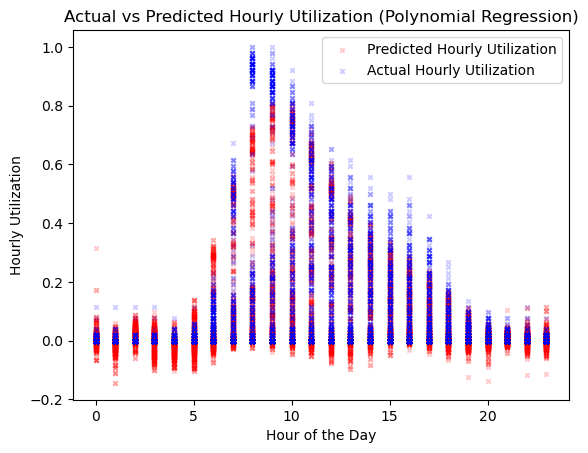

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Assuming 'Predict_utilization' is your DataFrame
# X will contain the features (hour, day_of_week, month, year)
X = Predict_utilization[['hour', 'day_of_week', 'month', 'year']]
y = Predict_utilization['hourly_utilization']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a polynomial regression model
degree = 10 # You can adjust the degree of the polynomial
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual and predicted hourly utilization over the hour
plt.scatter(X_test['hour'], y_pred, c='red', marker='x',label='Predicted Hourly Utilization', alpha=0.2, s=10)
plt.scatter(X_test['hour'], y_test, c='blue', marker='x', label='Actual Hourly Utilization', alpha=0.2, s=10)
plt.xlabel("Hour of the Day")
plt.ylabel("Hourly Utilization")
plt.title("Actual vs Predicted Hourly Utilization (Polynomial Regression)")
plt.legend()
plt.show()

### Discuss
Does it make sense to include khWdelivered? 
It is very easy to derive the utilization by khW delivered and in a prediction szenario we dont have this data